In [115]:
#importing basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import time #import time library as we will need to use it to check the runtime of our model
from datetime import timedelta
from tempfile import mkdtemp

pd.set_option('display.max_columns', None)

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [117]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import VarianceThreshold
!pip install --upgrade lightgbm
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import lightgbm as lgb
import xgboost as XGB

Requirement already up-to-date: lightgbm in /usr/local/lib/python3.7/dist-packages (3.2.1)


Game plan:
- Load both train and test set
- X_train, X_test
- Clean emtpy values
- Remove unnecessary columns
- Correlation check
- OHE
- Ordinal encoding

- Grid search (RF, GB, LR)


## 1. Loading data

In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
train = pd.read_csv('/content/drive/MyDrive/Kaggle project/House Prices - Advanced Regression Techniques/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [120]:
test = pd.read_csv('/content/drive/MyDrive/Kaggle project/House Prices - Advanced Regression Techniques/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 2. Clean empty values

Get the list of the columns contain empty values

In [121]:
train.isnull().mean()[train.isnull().mean() > 0]

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [122]:
test.isnull().mean()[test.isnull().mean() > 0]

MSZoning        0.002742
LotFrontage     0.155586
Alley           0.926662
Utilities       0.001371
Exterior1st     0.000685
Exterior2nd     0.000685
MasVnrType      0.010966
MasVnrArea      0.010281
BsmtQual        0.030158
BsmtCond        0.030843
BsmtExposure    0.030158
BsmtFinType1    0.028787
BsmtFinSF1      0.000685
BsmtFinType2    0.028787
BsmtFinSF2      0.000685
BsmtUnfSF       0.000685
TotalBsmtSF     0.000685
BsmtFullBath    0.001371
BsmtHalfBath    0.001371
KitchenQual     0.000685
Functional      0.001371
FireplaceQu     0.500343
GarageType      0.052090
GarageYrBlt     0.053461
GarageFinish    0.053461
GarageCars      0.000685
GarageArea      0.000685
GarageQual      0.053461
GarageCond      0.053461
PoolQC          0.997944
Fence           0.801234
MiscFeature     0.965045
SaleType        0.000685
dtype: float64

We will remove columns that has more than 20% missing values, as they arent contribute to the model, also `Id` columns:

In [123]:
drop_col = train.columns[train.isnull().mean() > 0.2]
drop_col

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [124]:
train = train.drop(columns = drop_col)
train = train.drop(columns = 'Id')
test = test.drop(columns = drop_col)
test = test.drop(columns = 'Id')

Reviewing the data description, we can see that several columns has NA as a valid data values (which mean the house doesnt have that feature), these columns are:
- MasVnrType
- MasVnrArea	
- BsmtQual
- BsmtCond
- BsmtExposure: 
- BsmtFinType1: 
- BsmtFinType2: 
- GarageType: 
- GarageYrBlt
- GarageFinish: 
- GarageQual: 
- GarageCond: 

For these columns, we will replace NaN values with the word `NA`.  

For the missing numeric columns, we can replace null values with the median.  

The rest will be fill with most common values (mode)

In [125]:
#Columns to fill with most popular(mode):
mode_fill_col = ['MSZoning',  'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType','Electrical', 'BsmtFullBath',
                   'BsmtHalfBath', 'KitchenQual', 'Functional',   'GarageYrBlt',  'GarageCars', 'SaleType']

#columns to fill with 'NA'
NA_fill_col = ['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','GarageType','GarageFinish','GarageQual', 'GarageCond']

#Columns to fill with mean
mean_fill_col = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GarageArea', 'LotFrontage', 'MasVnrArea', 'TotalBsmtSF']

In [126]:
#Replace values in train set
for i in mode_fill_col:
    train[i].fillna(train[i].mode()[0], inplace = True)
for i in NA_fill_col:
    train[i].fillna('NA', inplace = True)
for i in mean_fill_col:
    train[i].fillna(train[i].mean(), inplace = True)

#Replace values in test set
for i in mode_fill_col:
    test[i].fillna(test[i].mode()[0], inplace = True)
for i in NA_fill_col:
    test[i].fillna('NA', inplace = True)
for i in mean_fill_col:
    test[i].fillna(test[i].mean(), inplace = True)

In [127]:
train.isnull().sum().sum()+test.isnull().sum().sum()

0

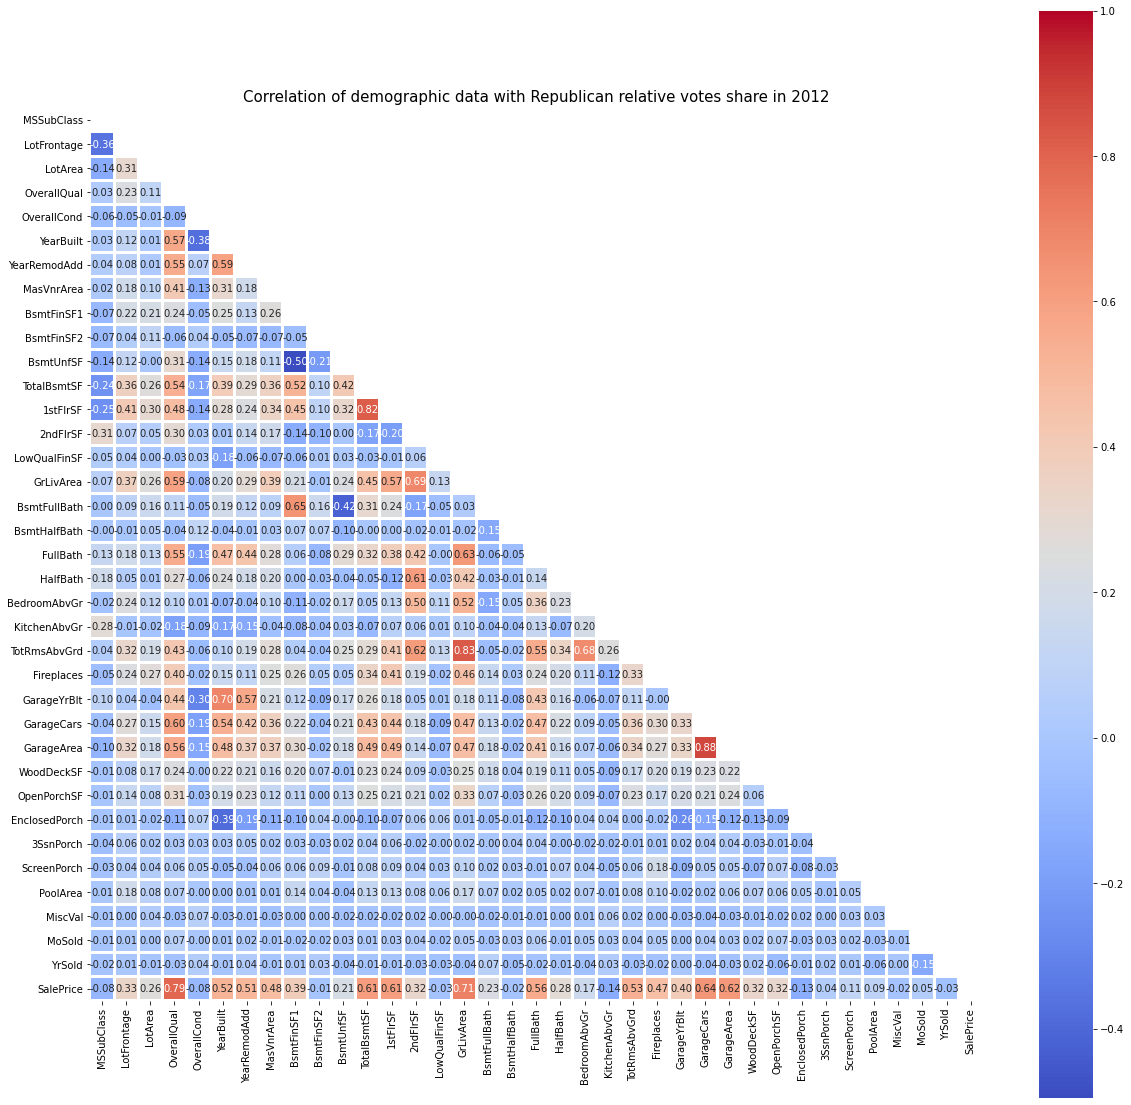

In [128]:
corrmat = train.corr() # creating correlation variable to use in chart
mask = np.triu(corrmat) # as corellation chart are symetrical, we use a mask to only get half the chart
f, ax = plt.subplots(figsize=(20, 20)) #set up canvas size
ax = sns.heatmap(corrmat, # correlation data
                 vmax=1, #color map setup
                 cmap="coolwarm", #colormap
                 square=True, #make each value to be the same shape
                 annot=True,fmt = '.2f',  #showing values inside square
                 linewidth=2, 
                 mask = mask) # showing only half the map
plt.title('Correlation of demographic data with Republican relative votes share in 2012', fontsize = 15) #set Chart title
plt.show()

We can see here that there are several column directly relate to each other. We can see it simply just by looking at the name (like GarageCars and GarageArea for example), and the correlation reflect that. These are:
- `GarageCars` and `GarageArea`
- `YearBuilt` and `GarageYrblt`
- `TotRmsAbvGrd` and `GrLivArea` and `BedroomAbvGrd` and `2ndFlrSF`
- `1stFlrSF` and `TotalBsmtSF`

Also `Yrsold` is irrelevant as we want to predict the price before it can be sold, so we will remove it

In [129]:
train = train.drop(columns = ['GarageCars', 'GarageYrBlt', 'BedroomAbvGr', '2ndFlrSF', 'TotalBsmtSF'])
test = test.drop(columns = ['GarageCars', 'GarageYrBlt', 'BedroomAbvGr', '2ndFlrSF', 'TotalBsmtSF'])

### Test (removing outlier)

In [130]:
from scipy import stats
# train[(np.abs(stats.zscore(train["SalePrice"])) < 3).all(axis=1)]
train = train[stats.zscore(train['SalePrice'])<3]

In [131]:
train.isnull().sum().sum()

0

## Base line model 

In [132]:
X_train = train.drop('SalePrice', axis = 1)
y_train = train['SalePrice']
X_test = test.copy()

There are several categorical features, in order to use them for our model, we will have to encode them.  
There will be 2 types of encode: 
- One Hot Encoding for simple categorical data
- Ordinal Encoding for hierarchy data

In [133]:
one_hot_col = ['MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
              'Foundation', 'Heating', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition']
ordinal_col = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Electrical', 'ExterCond', 'ExterQual', 'Functional',
 'GarageCond', 'GarageFinish', 'GarageQual', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandSlope', 'LotShape', 'Utilities']
num_col = list(set(X_train.columns)-set(one_hot_col)-set(ordinal_col))

### One Hot Encoding

In [134]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

X_train_ohe = X_train[one_hot_col]
X_test_ohe = X_test[one_hot_col]
# Create the column transformations list + columns to which to apply
col_transforms = [('MSZoning', OneHotEncoder(), ['MSZoning']),
                  ('Street', OneHotEncoder(), ['Street']),
                  ('LandContour', OneHotEncoder(), ['LandContour']),
                  ('LotConfig', OneHotEncoder(), ['LotConfig']),
                  ('Neighborhood', OneHotEncoder(), ['Neighborhood']),
                  ('Condition1', OneHotEncoder(), ['Condition1']),
                  ('Condition2', OneHotEncoder(), ['Condition2']),
                  ('BldgType', OneHotEncoder(), ['BldgType']),
                  ('RoofStyle', OneHotEncoder(), ['RoofStyle']),
                  ('RoofMatl', OneHotEncoder(), ['RoofMatl']),
                  ('Exterior1st', OneHotEncoder(), ['Exterior1st']),
                  ('Exterior2nd', OneHotEncoder(), ['Exterior2nd']),
                  ('MasVnrType', OneHotEncoder(), ['MasVnrType']),
                  ('Foundation', OneHotEncoder(), ['Foundation']),
                  ('Heating', OneHotEncoder(), ['Heating']),
                  ('GarageType', OneHotEncoder(), ['GarageType']),
                  ('PavedDrive', OneHotEncoder(), ['PavedDrive']),
                  ('SaleType', OneHotEncoder(), ['SaleType']),
                  ('SaleCondition', OneHotEncoder(), ['SaleCondition'])
                 ]


# Create the column transformer
col_trans = ColumnTransformer(col_transforms)

# Fit
col_trans = col_trans.fit(X_train_ohe)
#transform
X_train_ohe_matrix = col_trans.transform(X_train_ohe)
X_test_ohe_matrix = col_trans.transform(X_test_ohe)
#revert back to df 
X_train_ohe = pd.DataFrame.sparse.from_spmatrix(X_train_ohe_matrix, columns = col_trans.get_feature_names())
X_test_ohe = pd.DataFrame.sparse.from_spmatrix(X_test_ohe_matrix, columns = col_trans.get_feature_names())

### Ordinal Encoding

For ordinal Encoding, we will need to define the structure of each features, from low (bad) to high (good):

In [135]:
BsmtCond_ord = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
BsmtExposure_ord = ['NA', 'No', 'Mn', 'Av', 'Gd']
BsmtFinType1_ord = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
BsmtFinType2_ord = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
BsmtQual_ord = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
CentralAir_ord = ['N', 'Y']
Electrical_ord = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
ExterCond_ord = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
ExterQual_ord = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
FireplaceQu_ord = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
Functional_ord = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
GarageCond_ord = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
GarageFinish_ord = ['NA', 'Unf', 'RFn', 'Fin']
GarageQual_ord = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
HeatingQC_ord = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
HouseStyle_ord = ['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl']
KitchenQual_ord = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
LandSlope_ord = ['Sev', 'Mod', 'Gtl']
LotShape_ord = ['IR3', 'IR2', 'IR1', 'Reg']
Utilities_ord = ['ELO', 'NoSeWa', 'NoSewr', 'AllPub']


ordinal_list = [BsmtCond_ord,BsmtExposure_ord,  BsmtFinType1_ord, BsmtFinType2_ord,BsmtQual_ord, CentralAir_ord, Electrical_ord, ExterCond_ord,ExterQual_ord,
                Functional_ord, GarageCond_ord, GarageFinish_ord, GarageQual_ord, HeatingQC_ord, HouseStyle_ord, KitchenQual_ord,
                LandSlope_ord, LotShape_ord, Utilities_ord            
               ]

In [136]:
ordinal_col = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Electrical', 'ExterCond', 'ExterQual', 'Functional',
 'GarageCond', 'GarageFinish', 'GarageQual', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandSlope', 'LotShape', 'Utilities']

In [137]:
def ordinal_tran(data,order, col_name):
    OE = OrdinalEncoder(categories = [order])
    data[col_name] = OE.fit_transform(data[[col_name]])  

In [138]:
X_train_oe = X_train[ordinal_col]
X_test_oe = X_test[ordinal_col]
for i in range(len(ordinal_col)):
    ordinal_tran(X_train_oe,ordinal_list[i], X_train_oe.columns[i])
    ordinal_tran(X_test_oe,ordinal_list[i], X_test_oe.columns[i]) 

In [139]:
X_train = X_train[num_col].join(X_train_ohe).join(X_train_oe)
X_test = X_test[num_col].join(X_test_ohe).join(X_test_oe)

In [140]:
X_train.isnull().sum().sum()

3278

### Scale

In [141]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Addition data cleaning (dealing with skewness by log transformation)

In [142]:
y_train_log = np.log(y_train)

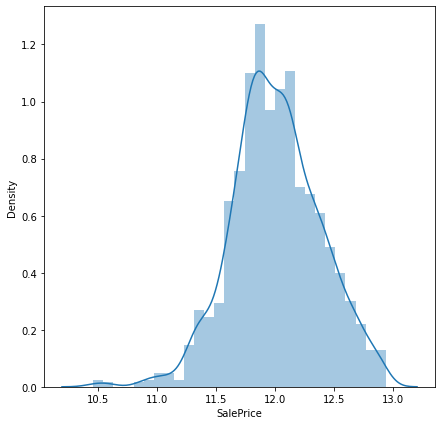

In [106]:
plt.figure(figsize = (7,7))
sns.distplot(y_train_log)
plt.show()

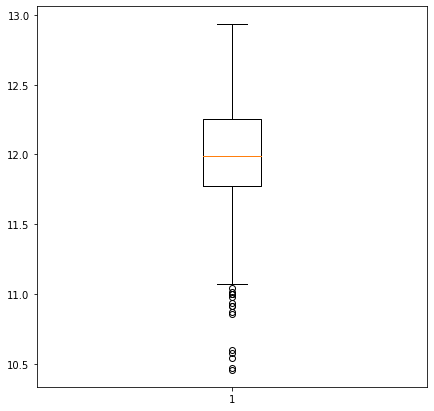

In [107]:
plt.figure(figsize = (7,7))
plt.boxplot(y_train_log)
plt.show()

### Randomizer search

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

my_grid_RF = {'scaler': [MinMaxScaler()],
               'model': [RandomForestRegressor()],
               'model__n_estimators': [10*i for i in range(1,11)],
               'model__bootstrap' : [True, False],
               'model__max_depth' : range(1,len(X_train.columns)),
               'model__max_features' : ['auto', 'sqrt', 'log2'],
               'model__min_samples_split' : [2,5,10],
               'model__min_samples_leaf' : [1,2,4]              
             }

my_grid_GB = {'scaler': [MinMaxScaler()],
               'model': [GradientBoostingRegressor()],
               'model__learning_rate': [10**i for i in range(-5,5)],
               'model__n_estimators': [10*i for i in range(3,11)],
               'model__max_depth' : range(1,len(X_train.columns)),
               'model__criterion' : ['friedman_mse', 'mse', 'mae'],
               'model__min_samples_split' : [2,5,10],
               'model__min_samples_leaf' : [1,2,4]}              
             

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
my_grid = [my_grid_RF, my_grid_GB]
my_steps = [('scaler', MinMaxScaler()), 
            ('model', RandomForestRegressor())]

my_pipe = Pipeline(my_steps)

randomize_search = RandomizedSearchCV(my_pipe,my_grid,cv = 5,
                                      n_iter=30,
                                     scoring = 'neg_mean_squared_log_error')

In [63]:
#randomize_search.fit(X_train_scaled, y_train)

In [64]:
#y_train_ran = randomize_search.predict(X_train_scaled)

NotFittedError: ignored

In [ ]:
#mean_squared_log_error(y_train, y_train_ran)

In [ ]:
#y_test_randomized = randomize_search.predict(X_test_scaled)

In [ ]:
# sample_submit = pd.read_csv('sample_submission.csv')
# submit = sample_submit.drop('SalePrice', axis = 1)
# submit['SalePrice'] = y_test_randomized
# submit.to_csv('submission6_randomized.csv', index = False)

XGB

In [65]:


XGB_model = XGB.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =7, nthread = -1)

In [68]:
XGB_model.fit(X_train_scaled,y_train_log)

[14:33:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1.7817, missing=None,
             n_estimators=2200, n_jobs=1, nthread=-1, objective='reg:linear',
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, seed=None, silent=None, subsample=0.5213,
             verbosity=1)

In [69]:
y_test_XGB = np.expm1(XGB_model.predict(X_test_scaled))

In [70]:
sample_submit = pd.read_csv('/content/drive/MyDrive/Kaggle project/House Prices - Advanced Regression Techniques/sample_submission.csv')
submit = sample_submit.drop('SalePrice', axis = 1)
submit['SalePrice'] = y_test_XGB
submit.to_csv('submission7_XGB.csv', index = False)

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
xgb1 = XGB.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.01,0.03, 0.05], #so called `eta` value
              'max_depth': [4,5, 6, 7],
              'min_child_weight': [1.5,2,3,4],
              'silent': [1],
              'reg_lamda' : [0.8,0.9],
              'subsample': [0.5,0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [1000,2000,2500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train_scaled, y_train_log)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed: 116.2min


KeyboardInterrupt: ignored

In [ ]:
y_train_grid_XGB = np.expm1(xgb_grid.predict(X_train_scaled))

In [ ]:
mean_squared_log_error(y_train, y_train_grid_XGB)

In [ ]:
y_test_stack = np.expm1(reg.predict(X_test_scaled))

In [ ]:
sample_submit = pd.read_csv('/content/drive/MyDrive/Kaggle project/House Prices - Advanced Regression Techniques/sample_submission.csv')
submit = sample_submit.drop('SalePrice', axis = 1)
submit['SalePrice'] = y_test_stack
submit.to_csv('submission9_stacking.csv', index = False)

## Ensemble with 1 layer


In [108]:
lgb_model = lgb.LGBMRegressor(colsample_bytree=0.25, learning_rate=0.01,
                              max_depth=13, min_child_samples=7, n_estimators=10000,
                              num_leaves=20, objective='regression', random_state=42,
                              subsample=0.9330025956033094, subsample_freq=1)

XGB_model = XGB.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =7, nthread = -1)

gbr_model = GradientBoostingRegressor(alpha=0.8979588317644014,
                                      learning_rate=0.01, loss='huber',
                                      max_depth=13, max_features=0.1, min_samples_split=109,
                                      n_estimators=10000, n_iter_no_change=100, random_state=42)

svr_model = SVR(C=0.7682824405204463, coef0=0.0001, degree=2, epsilon=0.0001, gamma=0.0042151786393578635, max_iter=10000)

lasso_model = Lasso(alpha=0.00012609086150256233, max_iter=5000, random_state=42)

ridge_model = Ridge(alpha=2.651347536470113, max_iter=5000, random_state=42)

enet_model = ElasticNet(alpha=0.0002286518512853544, l1_ratio=0.6510386358323069, max_iter=5000, random_state=42)

In [109]:
estimators = [('lgb', lgb_model),
              ('XGB', XGB_model),
              ('GBR', gbr_model),
              ('SVR', svr_model),
              ('lasso', lasso_model),
              ('ridge', ridge_model),
              ('enet', enet_model)
              ]
reg = StackingRegressor(
  estimators=estimators,
final_estimator=LinearRegression(),cv = 5)

In [110]:
reg.fit(X_train_scaled,y_train_log)

[19:49:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


ValueError: ignored

In [79]:
X_train.isnull().sum().sum()

3278

In [ ]:
y_test_stack2 = reg.predict(X_test_scaled)

In [ ]:
sample_submit = pd.read_csv('/content/drive/MyDrive/Kaggle project/House Prices - Advanced Regression Techniques/sample_submission.csv')
submit = sample_submit.drop('SalePrice', axis = 1)
submit['SalePrice'] = y_test_stack2
submit.to_csv('submission11_stacking.csv', index = False)

Ensemble with 2 layers
